In [1]:
import pandas as pd
df = pd.read_csv('feature.csv')
df.columns = ['si_sport_di_dport','label','pkts_cnt','sessn_dur','total_bytes','pkts_len_avg','total_bytes_tls','tlss_len_avg','tls_cip','tls_comp','tls_extlen','tls_exttype','tls_vers']
df.head()

,si_sport_di_dport,label,pkts_cnt,sessn_dur,total_bytes,pkts_len_avg,total_bytes_tls,tlss_len_avg,tls_cip,tls_comp,tls_extlen,tls_exttype,tls_vers
0,192.168.1.121:49280-95.46.8.65:443,Cobalt,20,1184.800982,4593,270.176471,4808,534.222222,49191,0,8,11,771
1,192.168.1.121:49161-95.46.8.65:443,Cobalt,20,1264.657474,4593,270.176471,4808,534.222222,49191,0,8,11,771
2,192.168.1.121:49288-95.46.8.65:443,Cobalt,19,1221.165027,4539,283.687500,4808,534.222222,49191,0,8,11,771
3,192.168.1.121:49182-95.46.8.65:443,Cobalt,19,1335.647753,4539,283.687500,4808,534.222222,49191,0,8,11,771
4,192.168.1.121:49239-95.46.8.65:443,Cobalt,19,1283.195257,4527,282.937500,4808,534.222222,49191,0,8,11,771


In [2]:
df.label.value_counts()

Trojan           2340
Dynamer          2296
Razy             1234
Dridex            804
Cobalt            245
DownloadGuide       5
Name: label, dtype: int64

In [3]:
df.describe()

,pkts_cnt,sessn_dur,total_bytes,pkts_len_avg,total_bytes_tls,tlss_len_avg,tls_cip,tls_comp,tls_extlen,tls_exttype,tls_vers
count,6924.000000,6924.000000,6924.000000,6924.000000,6924.000000,6924.000000,6924.000000,6924.0,6924.000000,6924.000000,6924.000000
mean,17.686742,87.468055,5133.123484,348.629858,18564.982958,2306.758277,49195.863085,0.0,18.642403,39687.694107,769.784229
std,3.775889,230.887491,1752.598062,50.705192,22990.205305,2826.655293,3.906058,0.0,11.239456,31868.549511,0.976514
min,11.000000,0.004296,3410.000000,228.850000,258.000000,51.600000,49191.000000,0.0,8.000000,11.000000,769.000000
25%,15.000000,0.993993,4115.000000,312.831044,6201.000000,915.000000,49191.000000,0.0,8.000000,11.000000,769.000000
50%,16.000000,2.508086,4604.000000,344.500000,8908.000000,1113.500000,49199.000000,0.0,17.000000,65281.000000,769.000000
75%,20.000000,11.187896,5514.000000,368.812500,15467.000000,2108.531250,49199.000000,0.0,36.000000,65281.000000,771.000000
max,41.000000,1336.791178,14629.000000,598.380952,220341.000000,18361.750000,49199.000000,0.0,36.000000,65281.000000,771.000000


In [4]:
# 数据拆分
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
all_inputs = df[['pkts_cnt','sessn_dur','total_bytes','pkts_len_avg','total_bytes_tls','tlss_len_avg','tls_cip','tls_comp','tls_extlen','tls_exttype','tls_vers']].values
all_inputs = SimpleImputer().fit_transform(all_inputs, "mean")
all_classes = df[["label"]].values.ravel()
(train_inputs, test_inputs, train_classes, test_classes) = train_test_split(all_inputs, all_classes, test_size=0.3)

In [5]:
# 随机森林
from sklearn.ensemble import RandomForestClassifier
# n_estimators：决策树的个数
# random_state：生成固定的森林
# verbose：输出日志，0默认无，1简单型，2复杂型
# n_jobs：进程数，-1火力全开
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn", lineno=246)
rfc = RandomForestClassifier(max_depth = 9, n_estimators = 10, random_state = 0, n_jobs = -1, verbose = 0)
rfc.fit(train_inputs, train_classes)
rfc_score = rfc.score(test_inputs, test_classes)
print('Score: {}'.format(rfc_score))
print('label有 %s 种，分别为：%s' % (rfc.n_classes_, rfc.classes_))
print('有 %s 棵树' % rfc.n_estimators)
print('所有树的配置：\n%s' % rfc.estimators_)
rfc_feature_import = pd.DataFrame({'feature': list(df.columns[2:]), 'importance': rfc.feature_importances_}).sort_values('importance', ascending=False)
print('各feature的重要性：\n%s' % rfc_feature_import)
%time

Score: 0.9995187680461982
label有 6 种，分别为：['Cobalt' 'DownloadGuide' 'Dridex' 'Dynamer' 'Razy' 'Trojan']
有 10 棵树
所有树的配置：
[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False,
            random_state=209652396, splitter='best'), DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False,
            random_state=398764591, splitter='best'), DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_

In [6]:
# 使用模型预测分类和预测概率
import numpy as np
rfc_predictions = rfc.predict(test_inputs)
rfc_probs = rfc.predict_proba(test_inputs)
rfc_probs

array([[0. , 0. , 0. , 1. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 1. ],
       [0. , 0.1, 0.1, 0. , 0.8, 0. ],
       ...,
       [0. , 0. , 0. , 0. , 1. , 0. ],
       [0.2, 0. , 0. , 0. , 0.8, 0. ],
       [0. , 0. , 0. , 1. , 0. , 0. ]])

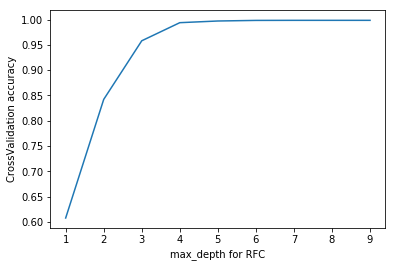

In [8]:
# x折交叉验证(Cross-Validation) 
# max_depth 深度参数寻优
from sklearn.model_selection import cross_val_score
import  matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=Warning, module="sklearn", lineno=652)
rfc_range = range(1,10)
rfc_score = []
# cv：选择每次测试折数
for i in rfc_range:
    rfc = RandomForestClassifier(max_depth = i, n_estimators = 10, random_state = 0, n_jobs = -1)
    scores = cross_val_score(rfc, all_inputs, all_classes, cv = 10, scoring = 'accuracy').mean()
    rfc_score.append(scores)
plt.figure()
plt.plot(rfc_range,rfc_score)
plt.xlabel('max_depth for RFC')
plt.ylabel('CrossValidation accuracy')
plt.show()

In [9]:
# 网格参数寻优(GridSearchCV) 
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn", lineno=125)
rfc_param_grid = {'max_depth':list((1,3,9,12,15)),'n_estimators':list((10,20,50,100,150))}
rfc_grid = GridSearchCV(RandomForestClassifier(n_jobs = -1), param_grid = rfc_param_grid, cv = 10)
rfc_grid.fit(train_inputs, train_classes)
rfc_grid.cv_results_, rfc_grid.best_params_, rfc_grid.best_score_

({'mean_fit_time': array([0.03157556, 0.04676907, 0.09630911, 0.16908176, 0.1771239 ,
         0.03290894, 0.04786677, 0.11031716, 0.19217486, 0.2014107 ,
         0.03055377, 0.05025713, 0.12427235, 0.2108907 , 0.20519826,
         0.03225772, 0.05063038, 0.12312264, 0.2072299 , 0.21667781,
         0.03040984, 0.05107791, 0.12233257, 0.20818605, 0.2189503 ]),
  'std_fit_time': array([0.00355946, 0.00414813, 0.00321154, 0.00909519, 0.00951147,
         0.00340756, 0.00347327, 0.00310769, 0.01698394, 0.01073245,
         0.00412088, 0.00350142, 0.00671554, 0.01083267, 0.01285692,
         0.00490813, 0.00213335, 0.00367415, 0.00673396, 0.01292282,
         0.00273896, 0.00318846, 0.0050679 , 0.014224  , 0.01306668]),
  'mean_score_time': array([0.10611951, 0.10613794, 0.10619125, 0.1061569 , 0.10482142,
         0.10576963, 0.10529885, 0.10610745, 0.10644138, 0.10564182,
         0.1069227 , 0.10624721, 0.10601592, 0.10447896, 0.10582936,
         0.10547111, 0.10589874, 0.10713711, 0.

In [11]:
# 保存model
from sklearn.externals import joblib
joblib.dump(rfc, 'rfc.pkl')

['rfc.pkl']

In [12]:
# 加载model并测试
from sklearn.externals import joblib
rfc_demo = joblib.load('rfc.pkl')
rfc_score = rfc_demo.score(test_inputs, test_classes)
print('Score: {}'.format(rfc_score))

Score: 0.9980750721847931
